In [1]:
import os
import sys
!pip install setuptools


In [2]:
!pip install opencv-python 

  Using cached opencv_python-4.5.3.56-cp37-cp37m-win_amd64.whl (34.9 MB)


In [3]:
import cv2


In [11]:
import cv2
def generate_dataset():

    face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

    def face_cropped(img):

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)

        if faces is ():
            return None
        for (x, y, w, h) in faces:
            cropped_face = img[y:y+h, x:x+w]
        return cropped_face
    cap = cv2.VideoCapture(0)
    img_id = 0

    while True:
        ret, frame = cap.read()

        if face_cropped(frame) is not None:

            img_id += 1
            face = cv2.resize(face_cropped(frame), (700, 700))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

            file_name_path = "data/"+"cap."+str(img_id)+".jpg"
            cv2.imwrite(file_name_path, face)
            cv2.putText(face, str(img_id), (50,50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2 )

            cv2.imshow("Cropped_Face", face)
            if cv2.waitKey(1)==13 or int(img_id) == 100:
                break

    cap.release()
    cv2.destroyAllWindows()
    print("Collecting samples is completed !!!")


generate_dataset()


<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-11-921b44ca711f>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [ ]:
## create labels

In [4]:
!pip install tqdm

In [5]:
import numpy as np
def my_label(image_name):
    name = image_name.split('.')[-3]
    if name=="yasin":
        return np.array([1,0,0])
    elif name=="Isophel":
        return np.array([0,1,0])
    elif name=="tumusime":
        return np.array([0,0,1])
     

In [ ]:
##creat data

In [6]:
import os 
from random import shuffle
from tqdm import tqdm


In [7]:
def my_data():
    data =[]
    for img in tqdm(os.listdir("data")):
        path=os.path.join("data",img)
        img_data = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data,(50,50))
        data.append([np.array(img_data),my_label(img)])
    shuffle(data)
    return data
        
          

In [8]:
data = my_data() 

100%|██████████| 1638/1638 [00:17<00:00, 92.81it/s] 


In [16]:
train = data[:1310]
test = data[328:]
x_train = np.array([i[0] for i in train]).reshape(-1,50,50,1)
print(x_train.shape)
y_train = [i[1] for i in train]
x_test = np.array([i[0] for i in test]).reshape(-1,50,50,1)
print(x_test.shape)
y_test = [i[1] for i in test]


(1310, 50, 50, 1)
(1310, 50, 50, 1)


In [ ]:
##creating the model

In [11]:
!pip install tflearn

  Using cached Pillow-8.3.1-1-cp37-cp37m-win_amd64.whl (3.2 MB)
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127300 sha256=283477ef59a4adc9df2ae2ece296d61157be3ffbe3b0fc52670acd236ee5f377
  Stored in directory: c:\users\personal\appdata\local\pip\cache\wheels\5f\14\2e\1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [12]:
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [17]:
tf.compat.v1.reset_default_graph()
convnet = input_data(shape=[50,50,1])
convnet = conv_2d(convnet, 32, 5,activation='relu')
#32 for filtering and 5 is the stride ie 5 pixels are moved
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5,activation='relu')
convnet = max_pool_2d(convnet, 5) 
convnet = conv_2d(convnet, 12, 5,activation='relu')
convnet = max_pool_2d(convnet, 5) 
convnet = conv_2d(convnet, 64, 5,activation='relu')
convnet = max_pool_2d(convnet, 5) 
convnet = conv_2d(convnet, 32, 5,activation='relu')
convnet = max_pool_2d(convnet, 5) 

convnet = fully_connected(convnet, 1024, activation= 'relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 3, activation= 'softmax')
convnet = regression(convnet, optimizer='adam',learning_rate =0.001, loss='categorical_crossentropy')
model = tflearn.DNN(convnet, tensorboard_verbose=1)
model.fit(x_train, y_train,n_epoch=12, validation_set=(x_test, y_test),show_metric = True, run_id="yas")

Training Step: 251  | total loss: 0.00023 | time: 5.694s
| Adam | epoch: 012 | loss: 0.00023 - acc: 1.0000 -- iter: 1280/1310
Training Step: 252  | total loss: 0.00021 | time: 7.340s
| Adam | epoch: 012 | loss: 0.00021 - acc: 1.0000 | val_loss: 0.00009 - val_acc: 1.0000 -- iter: 1310/1310
--


In [18]:
##visualise the data

In [19]:
def data_for_visualisation():
    Vdata = []
    for img in tqdm(os.listdir("visualisedata")):
        path = os.path.join("visualisedata",img)
        img_num = img.split('.')[0]
        img_data = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data,(50,50))
        Vdata.append([np.array(img_data),img_num])
    shuffle(Vdata)
    return data
        
        

In [20]:
Vdata = data_for_visualisation()

100%|██████████| 30/30 [00:02<00:00, 13.72it/s]


In [21]:
##graph for data

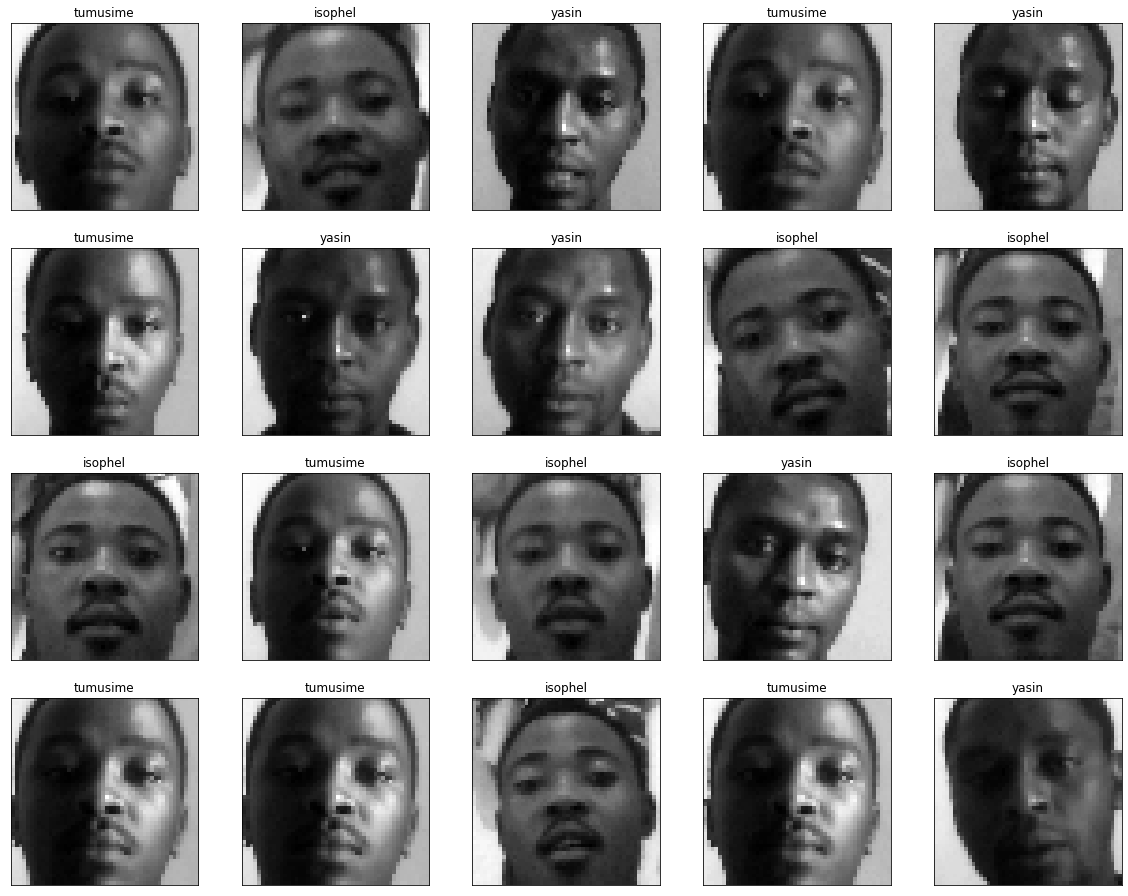

In [23]:
import matplotlib.pyplot as plt #install matplotlib

fig = plt.figure(figsize=(20,20))
for num, data in enumerate(Vdata[:20]):
    img_data = data[0]
    y = fig.add_subplot(5,5, num+1)
    image = img_data
    data = img_data.reshape(50,50,1)
    model_out = model.predict([data])[0]
    if np.argmax(model_out) == 0:
        my_label = 'yasin'
    elif np.argmax(model_out) == 1:
        my_label = 'isophel'
    else:
        my_label = 'tumusime'
    y.imshow(image, cmap='gray')
    plt.title(my_label)
    
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()
        
    
    